In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import dataframe_image as dfi
import matplotlib.pyplot as plt

For beginning: https://www.destatis.de/Europa/DE/Thema/GreenDeal/_inhalt.html#798700

# 1. EV Market

https://ec.europa.eu/eurostat/databrowser/view/ROAD_EQR_CARPDA__custom_16264878/default/table?lang=en

In [3]:
df = pd.read_csv('Data/estat_road_eqr_carpda_filtered_en.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   STRUCTURE                                         122 non-null    object 
 1   STRUCTURE_ID                                      122 non-null    object 
 2   freq: Time frequency                              122 non-null    object 
 3   unit: Unit of measure                             122 non-null    object 
 4   mot_nrg: Motor energy                             122 non-null    object 
 5   geo: Geopolitical entity (reporting)              122 non-null    object 
 6   TIME_PERIOD: Time                                 122 non-null    int64  
 7   OBS_VALUE: Observation value                      122 non-null    int64  
 8   OBS_FLAG: Observation status (Flag) V2 structure  3 non-null      object 
 9   CONF_STATUS: Confiden

In [4]:
df = df.rename(columns={'OBS_VALUE: Observation value': 'Number',
                        'TIME_PERIOD: Time': 'Year',
                        'mot_nrg: Motor energy': 'Motor Energy',
})

df = df[['Year', 'Motor Energy', 'Number']]

In [5]:
df['Motor Energy'].unique()

array(['ALT: Alternative energy', 'DIE: Diesel',
       'DIE_X_HYB: Diesel (excluding hybrids) \xa0', 'ELC: Electricity',
       'ELC_DIE_HYB: Hybrid diesel-electric',
       'ELC_DIE_PI: Plug-in hybrid diesel-electric \xa0',
       'ELC_PET_HYB: Hybrid electric-petrol',
       'ELC_PET_PI: Plug-in hybrid petrol-electric \xa0',
       'GAS: Natural gas', 'HYD_FCELL: Hydrogen and fuel cells\xa0',
       'LPG: Liquefied petroleum gases (LPG)', 'OTH: Other',
       'PET: Petroleum products',
       'PET_X_HYB: Petrol (excluding hybrids) \xa0'], dtype=object)

We have to filter out the categories 'ALT', 'DIE', 'ELC' and 'PET', as the other are of no use for us.

In [6]:
df = df[df['Motor Energy'].str.contains('|'.join(['ALT:', 'DIE:', 'ELC:', 'GAS:', 'HYD_FCELL:', 'LPG:', 'OTH:', 'PET:']))]
df

,Year,Motor Energy,Number
0,2014,ALT: Alternative energy,50482
1,2015,ALT: Alternative energy,56202
2,2016,ALT: Alternative energy,65703
3,2017,ALT: Alternative energy,33326
4,2018,ALT: Alternative energy,51711
...,...,...,...
110,2019,PET: Petroleum products,2298504
111,2020,PET: Petroleum products,1760071
112,2021,PET: Petroleum products,1560342
113,2022,PET: Petroleum products,1520618


In [7]:
df['Total_per_Year'] = df.groupby(['Year'])['Number'].transform('sum')
df['Percentage'] = df['Number']/df['Total_per_Year']

In [8]:
df['Motor Energy'].unique()

array(['ALT: Alternative energy', 'DIE: Diesel', 'ELC: Electricity',
       'GAS: Natural gas', 'HYD_FCELL: Hydrogen and fuel cells\xa0',
       'LPG: Liquefied petroleum gases (LPG)', 'OTH: Other',
       'PET: Petroleum products'], dtype=object)

In [9]:
df['Label'] = df['Motor Energy'].str.partition(sep=':')[0]
df

,Year,Motor Energy,Number,Total_per_Year,Percentage,Label
0,2014,ALT: Alternative energy,50482,3087255,0.016352,ALT
1,2015,ALT: Alternative energy,56202,3262316,0.017228,ALT
2,2016,ALT: Alternative energy,65703,3417342,0.019226,ALT
3,2017,ALT: Alternative energy,33326,3471588,0.009600,ALT
4,2018,ALT: Alternative energy,51711,3487489,0.014828,ALT
...,...,...,...,...,...,...
110,2019,PET: Petroleum products,2298504,3685745,0.623620,PET
111,2020,PET: Petroleum products,1760071,3125949,0.563052,PET
112,2021,PET: Petroleum products,1560342,2992661,0.521389,PET
113,2022,PET: Petroleum products,1520618,3139678,0.484323,PET


### 1.1. New EVs on Road

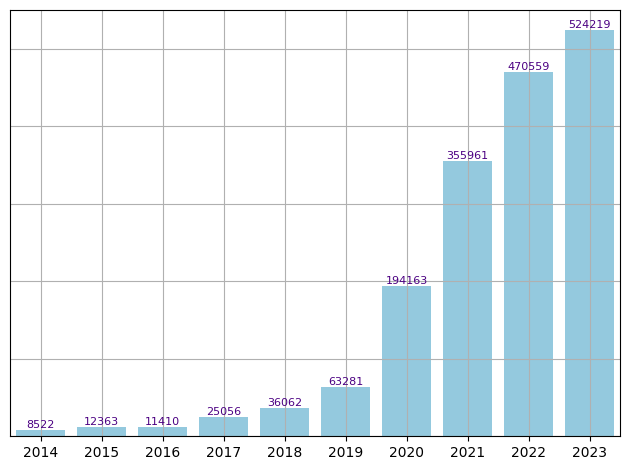

In [10]:
# Seaborn Plot
ax = sns.barplot(df[df['Label'] == 'ELC'], x="Year", y="Number", color='skyblue')

# Plot Ticks
ax.bar_label(ax.containers[0], fontsize=8, color='indigo')

# Grid
ax.grid()

# X-axis
ax.set_xlabel('')

# Y-axis
ax.set_yticklabels([])
ax.set_ylabel('')
ax.tick_params(axis='y', length=0)


# Save Figure
fig = ax.get_figure()
fig.set_tight_layout(True)
fig.savefig("paper/images/EV_amount", dpi=100) 

<Figure size 2500x800 with 0 Axes>

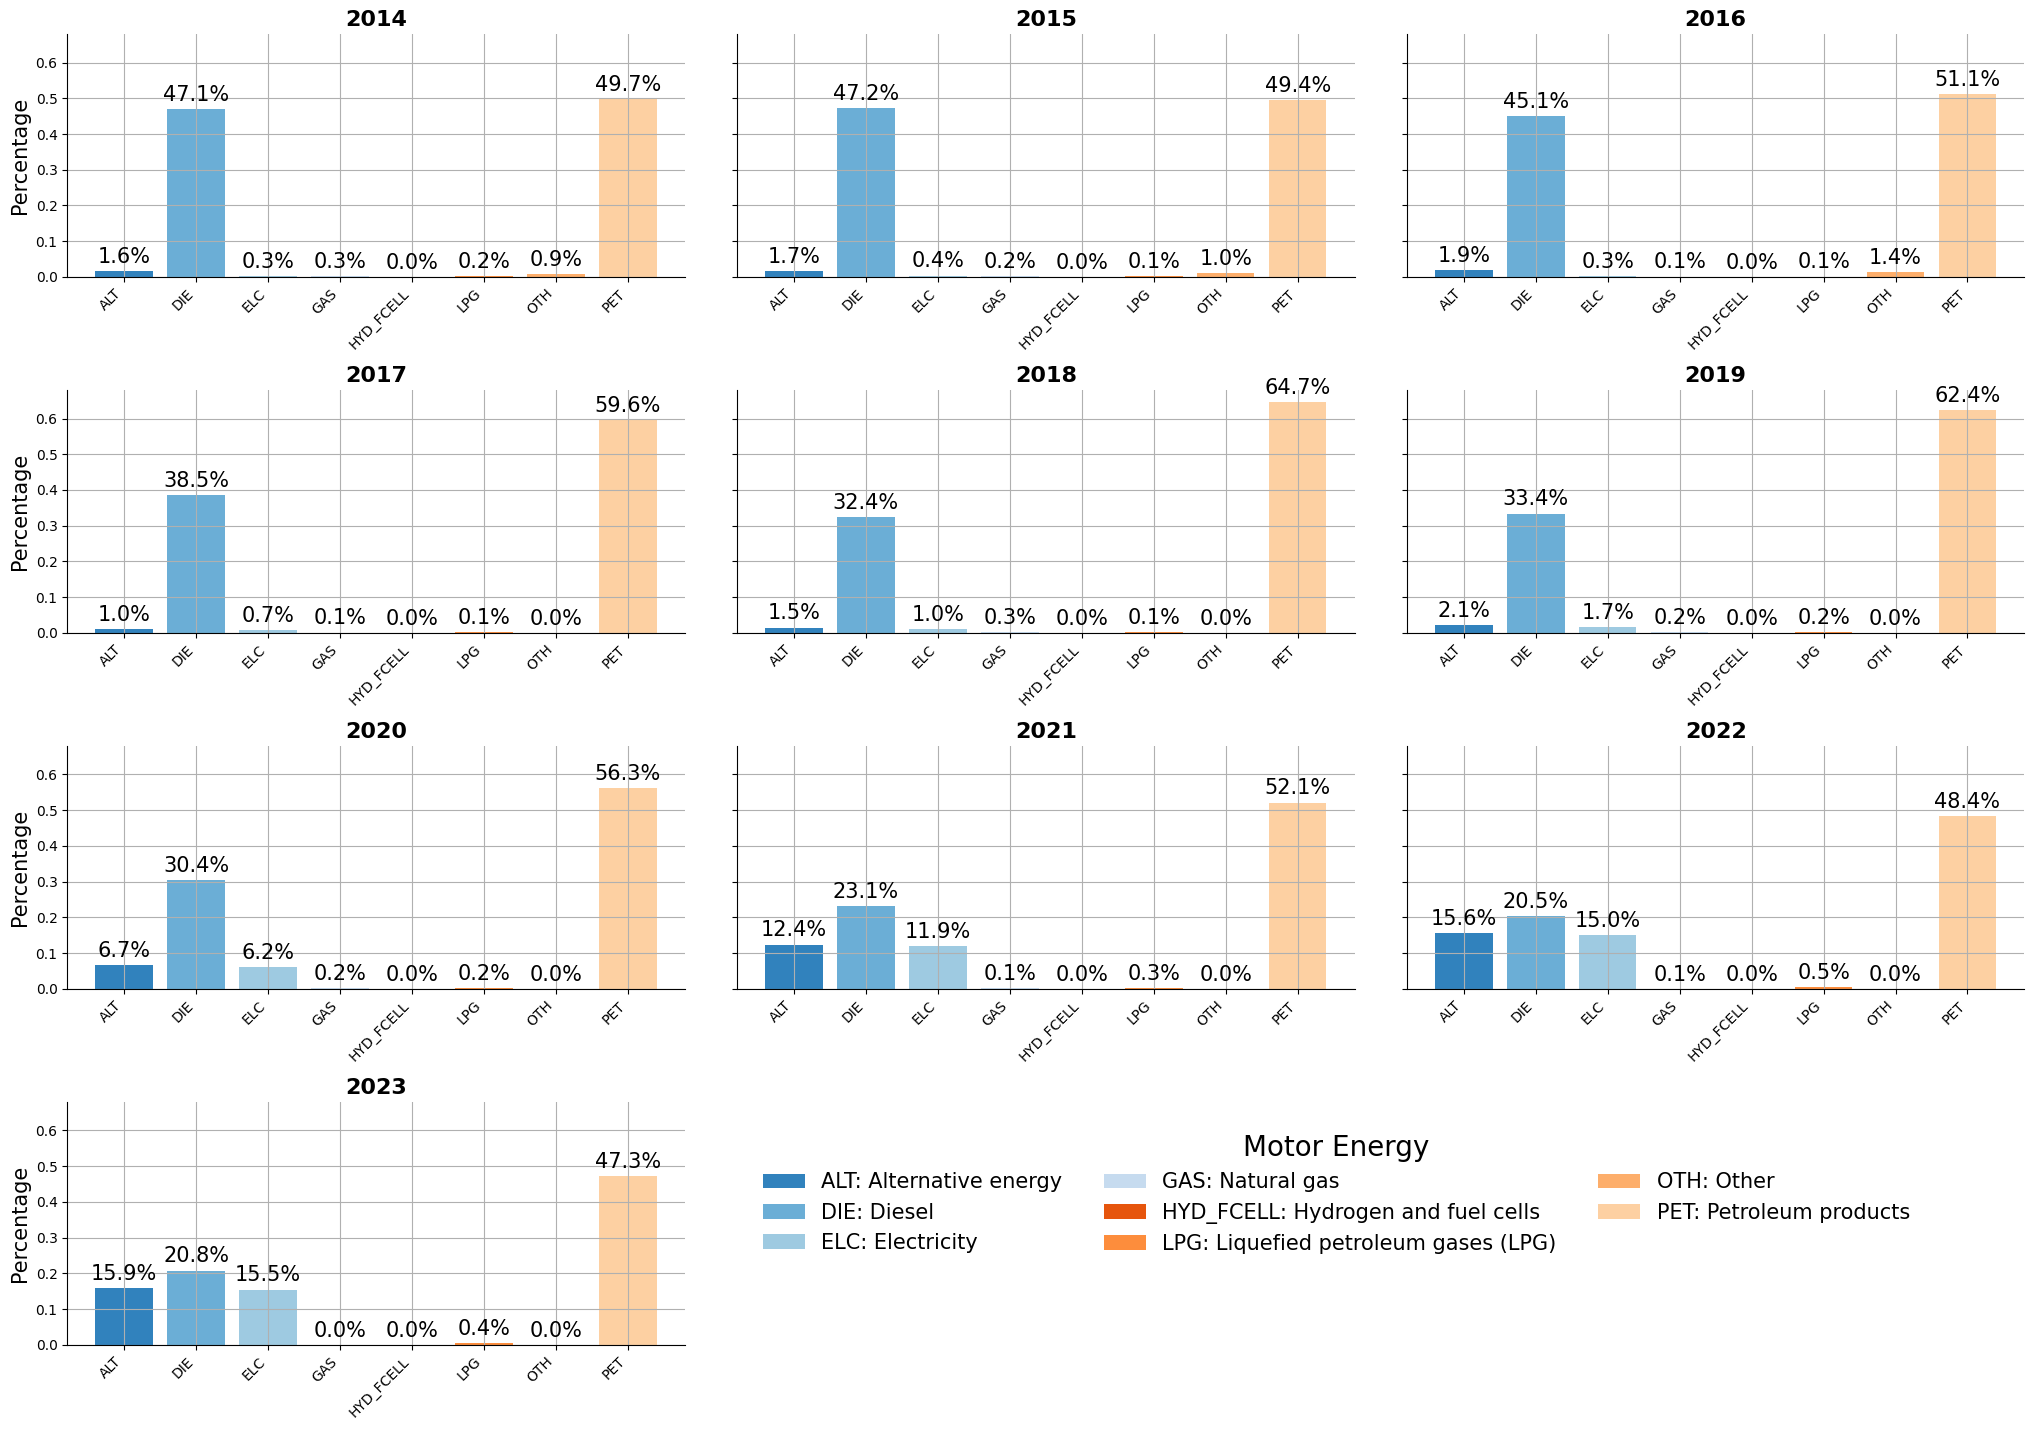

In [11]:
# Created with Chat GPT's Assistance

# Custom function to plot and annotate
def barplot_with_labels(data, **kwargs):
    ax = plt.gca()
    bars = ax.bar(data['Motor Energy'], data['Percentage'], **kwargs)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height * 100:.1f}%',  # Multiply by 100 to get percentage
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # Offset slightly above the bar
            textcoords="offset points",
            ha='center', va='bottom', fontsize=15)
        
plt.figure(figsize=(25, 8))

# Create FacetGrid
grid = sns.FacetGrid(df, col="Year", hue="Motor Energy", palette="tab20c", col_wrap=3, height=4, aspect=.75)

# Plot bars with annotations
grid.map_dataframe(barplot_with_labels)

# Remove "Year = " from titles
for ax, title in zip(grid.axes.flatten(), grid.col_names):
    ax.set_title(title, fontsize=16, fontweight='bold')
    data_year = df[df['Year'] == title]

    motor_energies = data_year['Motor Energy'].tolist()
    labels = data_year['Label'].tolist()
    
    # Set ticks at positions 0, 1, 2, ...
    ax.set_xticks(range(len(motor_energies)))
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    ax.tick_params(axis='x', labelbottom=True)


# Rotate x-tick labels for clarity
for ax in grid.axes.flatten():
    #ax.set_xticklabels([])#ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.grid()

# Remove all x-axis labels and set y-axis label
grid.set_axis_labels("", "Percentage", fontsize=15)

# Add legend centered below plots
grid.add_legend(bbox_to_anchor=(0.65, .3), 
                loc='upper center', ncol=3, fontsize=15,
                frameon=False)

grid._legend.set_title("Motor Energy")
grid._legend.get_title().set_fontsize(20)

# Adjust layout to make space for legend
grid.tight_layout(w_pad=1, h_pad=1, rect=[0, .1, 1, 1])

# Save high-res figure
plt.savefig("paper/images/Veh_Mark", dpi=300, bbox_inches='tight')


### 1.3. Density of EVs

In [14]:
gpd.read_file('Data/vg2500_12-31.utm32s.shape/vg2500/VG2500_KRS.shp')

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,geometry
0,DEBKGVG300000004,2021-09-01,4,9,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,01,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,"POLYGON ((531470.957 6075201.09, 532435.433 60..."
1,DEBKGVG300000005,2021-09-01,4,9,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,02,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,"POLYGON ((577310.28 6027466.911, 576863.752 60..."
2,DEBKGVG300000006,2021-09-01,4,9,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,03,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,"POLYGON ((624204.438 5980391.723, 624886.676 5..."
3,DEBKGVG300000007,2021-09-01,4,9,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,...,04,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,"POLYGON ((567602.493 5998385.945, 566865.243 5..."
4,DEBKGVG300000008,2021-09-01,4,9,1,01051,01051,010510044044,Dithmarschen,Kreis,...,51,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,"MULTIPOLYGON (((479551.742 5990180.683, 479871..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,DEBKGVG3000000B1,2023-12-31,4,9,1,16073,16073,160730077077,Saalfeld-Rudolstadt,Landkreis,...,73,00,00,000,R,DEG0U,160730000000,16073000,2019-01-01,"POLYGON ((663553.496 5629582.315, 663766.567 5..."
396,DEBKGVG3000000B2,2021-09-01,4,9,1,16074,16074,160745052018,Saale-Holzland-Kreis,Landkreis,...,74,00,00,000,R,DEG0J,160740000000,16074000,2009-01-01,"POLYGON ((711903.933 5650555.285, 712188.06 56..."
397,DEBKGVG3000000B3,2021-09-01,4,9,1,16075,16075,160750098098,Saale-Orla-Kreis,Landkreis,...,75,00,00,000,R,DEG0K,160750000000,16075000,2009-01-01,"POLYGON ((708424.532 5608635.989, 706994.951 5..."
398,DEBKGVG3000000B4,2021-09-01,4,9,1,16076,16076,160760022022,Greiz,Landkreis,...,76,00,00,000,R,DEG0L,160760000000,16076000,2009-01-01,"POLYGON ((726352.625 5648413.044, 727521.276 5..."


In [15]:
KRS = gpd.read_file('Data/vg2500_12-31.utm32s.shape/vg2500/VG2500_KRS.shp')
KRS1221 = pd.read_excel('Data/Deutschlandatlas-Daten.xlsx', sheet_name='Deutschlandatlas_KRS1221', usecols=['KRS1221', 'Kreisname', 'eauto', 'elade'])

In [16]:
KRS

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_K,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,geometry
0,DEBKGVG300000004,2021-09-01,4,9,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,01,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,"POLYGON ((531470.957 6075201.09, 532435.433 60..."
1,DEBKGVG300000005,2021-09-01,4,9,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,02,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,"POLYGON ((577310.28 6027466.911, 576863.752 60..."
2,DEBKGVG300000006,2021-09-01,4,9,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,03,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,"POLYGON ((624204.438 5980391.723, 624886.676 5..."
3,DEBKGVG300000007,2021-09-01,4,9,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,...,04,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,"POLYGON ((567602.493 5998385.945, 566865.243 5..."
4,DEBKGVG300000008,2021-09-01,4,9,1,01051,01051,010510044044,Dithmarschen,Kreis,...,51,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,"MULTIPOLYGON (((479551.742 5990180.683, 479871..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,DEBKGVG3000000B1,2023-12-31,4,9,1,16073,16073,160730077077,Saalfeld-Rudolstadt,Landkreis,...,73,00,00,000,R,DEG0U,160730000000,16073000,2019-01-01,"POLYGON ((663553.496 5629582.315, 663766.567 5..."
396,DEBKGVG3000000B2,2021-09-01,4,9,1,16074,16074,160745052018,Saale-Holzland-Kreis,Landkreis,...,74,00,00,000,R,DEG0J,160740000000,16074000,2009-01-01,"POLYGON ((711903.933 5650555.285, 712188.06 56..."
397,DEBKGVG3000000B3,2021-09-01,4,9,1,16075,16075,160750098098,Saale-Orla-Kreis,Landkreis,...,75,00,00,000,R,DEG0K,160750000000,16075000,2009-01-01,"POLYGON ((708424.532 5608635.989, 706994.951 5..."
398,DEBKGVG3000000B4,2021-09-01,4,9,1,16076,16076,160760022022,Greiz,Landkreis,...,76,00,00,000,R,DEG0L,160760000000,16076000,2009-01-01,"POLYGON ((726352.625 5648413.044, 727521.276 5..."


In [17]:
KRS1221

,KRS1221,Kreisname,elade,eauto
0,1001000,"Flensburg, Stadt",181.52,2.361338
1,1002000,"Kiel, Landeshauptstadt",166.72,2.154403
2,1003000,"Lübeck, Hansestadt",70.61,1.761325
3,1004000,"Neumünster, Stadt",222.64,2.423810
4,1051000,Dithmarschen,198.15,1.911245
...,...,...,...,...
395,16073000,Saalfeld-Rudolstadt,92.62,0.980817
396,16074000,Saale-Holzland-Kreis,136.96,1.156197
397,16075000,Saale-Orla-Kreis,189.45,0.769996
398,16076000,Greiz,58.10,0.901201


In [18]:
KRS['AGS_0'] = pd.to_numeric(KRS['AGS_0'])
d = pd.merge(KRS, KRS1221, how='outer', left_on='AGS_0', right_on='KRS1221')

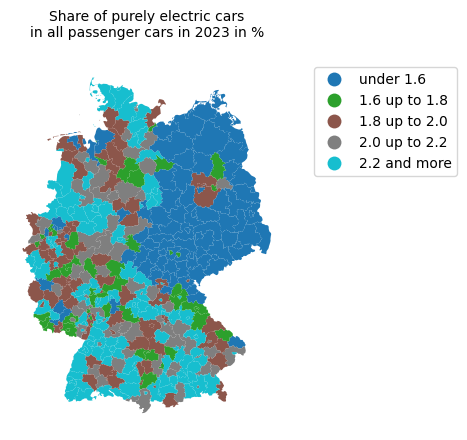

In [21]:
# Classification Bins
bins = [0, 1.6, 1.8, 2.0, 2.2, float('inf')]
# Classification Labels
labels = ['under 1.6', '1.6 up to 1.8', '1.8 up to 2.0', '2.0 up to 2.2', '2.2 and more']

# Classification
d['class'] = pd.cut(d['eauto'], bins=bins, labels=labels, include_lowest=True)

# Plot
ax = d.plot(column='class', legend=True, legend_kwds={'bbox_to_anchor': (1.66, 1)})

# Axes
ax.set_axis_off()

# Title
ax.set_title('Share of purely electric cars\nin all passenger cars in 2023 in %',size=10)

# Save Plot
plt.savefig('paper/images/EV_percentage', dpi=100)
plt.show()

In [23]:
df_im = d.groupby('BEZ').mean(numeric_only=True)[['eauto']].rename(columns = {'eauto': 'EVs'}, 
                                                                   index={'Kreis': 'District',
                                                                          'Landkreis': 'Rural District',
                                                                          'Kreisfreie Stadt': 'District-Free City',
                                                                          'Stadtkreis': 'Urban District'}).transpose()
df_im.dfi.export('paper/images/EVs_mean.png')

# 2. Charging Infrastructure

https://www.deutschlandatlas.bund.de/DE/Karten/Wie-wir-uns-bewegen/113-Oeffentl-Ladeinfrastruktur-EAuto.html#_dehwqf58q

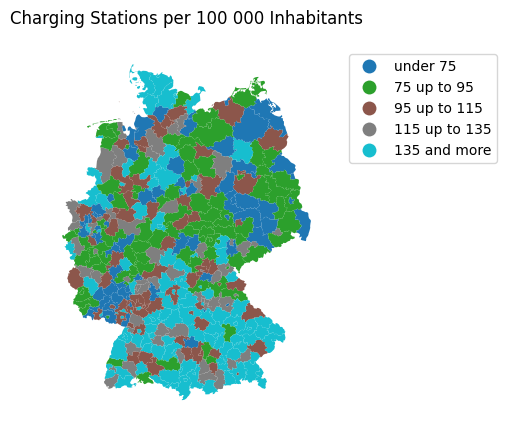

In [24]:
# Classification Bins
bins = [0] + list(range(75, 136, 20)) + [float('inf')]
# Classification Labels
labels = ['under 75'] + [str(i) + ' up to ' + str(i+20) for i in range(75, 135, 20)] + ['135 and more']

# Classification
d['class_elade'] = pd.cut(d['elade'], bins=bins, labels=labels, include_lowest=True)

# Plot
ax = d.plot(column='class_elade', legend=True, legend_kwds={'bbox_to_anchor': (1.66, 1)})

# Title
ax.set_title('Charging Stations per 100 000 Inhabitants')

# Axes
ax.set_axis_off()

# Save Plot
plt.savefig('paper/images/Charging_stations', dpi=100)
plt.show()

In [25]:
df_im = d.groupby('BEZ').mean(numeric_only=True)[['elade']].rename(columns = {'elade': 'Charging Stations'}, 
                                                           index={'Kreis': 'District',
                                                                  'Landkreis': 'Rural District',
                                                                  'Kreisfreie Stadt': 'District-Free City',
                                                                  'Stadtkreis': 'Urban District'}).transpose()
df_im.dfi.export('paper/images/Charg_mean.png')

# 3. Energy Price Comparison

### 3.1. Petroleum and Diesel Prices

https://www.bundeskartellamt.de/DE/Aufgaben/MarkttransparenzstelleFuerKraftstoffe/MTS-K_Infotext/mts-k.html

https://energy.ec.europa.eu/data-and-analysis/weekly-oil-bulletin_en


In [26]:
petr = pd.read_excel('Data/Weekly_Oil_Bulletin_Prices_History_maticni_4web.xlsx')
petr

,Consumer prices of petroleum products inclusive of duties and taxes,CTR,EU_price_with_tax_euro95,EU_price_with_tax_diesel,EU_price_with_tax_heEUing_oil,EU_price_with_tax_fuel_oil_1,EU_price_with_tax_fuel_oil_2,EU_price_with_tax_LPG,CTR.1,EUR_price_with_tax_euro95,...,SK_price_with_tax_fuel_oil_2,SK_price_with_tax_LPG,CTR.29,UK_exchange_rate,UK_price_with_tax_euro95,UK_price_with_tax_diesel,UK_price_with_tax_heUKing_oil,UK_price_with_tax_fuel_oil_1,UK_price_with_tax_fuel_oil_2,UK_price_with_tax_LPG
0,NaN,NaN,Euro-super 95 (I),Gas oil automobile Automotive gas oil Dieselkr...,Gas oil de chauffage Heating gas oil Heizöl (II),Fuel oil - Schweres Heizöl (III) Soufre,Fuel oil -Schweres Heizöl (III) Soufre > 1% S...,GPL pour moteur LPG motor fuel,NaN,Euro-super 95 (I),...,Fuel oil -Schweres Heizöl (III) Soufre > 1% S...,GPL pour moteur LPG motor fuel,NaN,NaN,Euro-super 95 (I),Gas oil automobile Automotive gas oil Dieselkr...,Gas oil de chauffage Heating gas oil Heizöl (II),Fuel oil - Schweres Heizöl (III) Soufre,Fuel oil -Schweres Heizöl (III) Soufre > 1% S...,GPL pour moteur LPG motor fuel
1,Date,NaN,1000 l,1000 l,1000 l,t,t,1000 l,NaN,1000 l,...,t,1000 l,NaN,NaN,1000 l,1000 l,1000 l,t,t,1000 l
2,2025-04-07 00:00:00,EU_,1654.32143,1555.100278,1012.34604,724.161214,512.893225,745.150376,EUR_,1707.487365,...,659.31,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-31 00:00:00,EU_,1659.83375,1565.560512,1024.909521,707.664679,527.703838,755.39786,EUR_,1705.61226,...,646.04,769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-24 00:00:00,EU_,1646.427625,1564.111793,1046.835488,709.105638,518.894376,755.641143,EUR_,1692.652802,...,641.26,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,NaN,(IV),The prices inclusive of duties and taxes are V...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,NaN,The prices communicated by the Member States a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Filtering for Germany
Prices = petr[['Consumer prices of petroleum products inclusive of duties and taxes'] + [gr for gr in petr.columns if 'GR' in gr]].drop(index=[0,1], axis=0).reset_index(drop=True)
Prices.columns

Index(['Consumer prices of petroleum products inclusive of duties and taxes',
       'GR_price_with_tax_euro95', 'GR_price_with_tax_diesel',
       'GR_price_with_tax_heGRing_oil', 'GR_price_with_tax_fuel_oil_1',
       'GR_price_with_tax_fuel_oil_2', 'GR_price_with_tax_LPG'],
      dtype='object')

In [28]:
# Renaming Columns to 'Date', 'Petroleum' and 'Diesel'
Prices = Prices.rename(columns={'Consumer prices of petroleum products inclusive of duties and taxes': 'Date',
               'GR_price_with_tax_euro95': 'Petroleum',
               'GR_price_with_tax_diesel': 'Diesel'
})

# Filtering for above Columns
Prices = Prices[['Date', 'Petroleum', 'Diesel']].dropna()

# Reversing the Sequence
Prices=Prices.iloc[::-1]

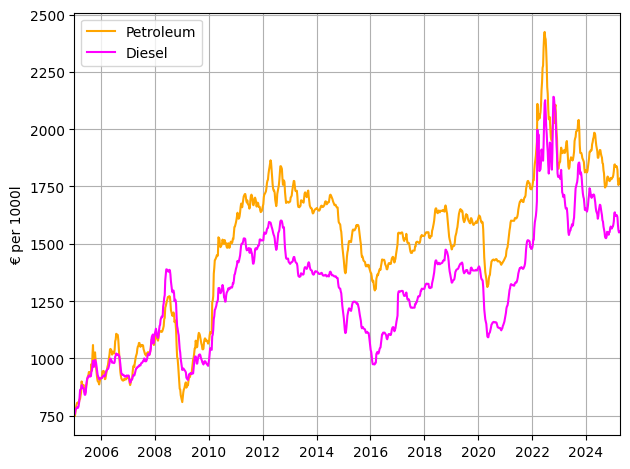

In [29]:
# Figure and Axis
fig, ax = plt.subplots(layout='constrained')

# Petroleum Plot
ax.plot(Prices['Date'], Prices['Petroleum'], color='orange', label='Petroleum')

# Diesel Plot
ax.plot(Prices['Date'], Prices['Diesel'], color='magenta', label='Diesel')

# Title
#ax.set_title('Prices Variance for Petroleum and Diesel', size=15)

# X-Axis Limits and Label
ax.set_xlim(Prices['Date'].min(), Prices['Date'].max())
ax.set_xlabel('Year')

# Y-Axis Label
ax.set_ylabel(f'\u20ac per 1000l')
ax.set_xlabel(None)

# Legend
ax.legend()

# Grid
ax.grid()

# Tigh Layout Configuration
fig.set_tight_layout(True)

# Save Figure
fig.savefig('paper/images/gas_diesel_prices')

In [30]:
Prices.iloc[-1]

Date         2025-04-07 00:00:00
Petroleum                   1785
Diesel                      1551
Name: 0, dtype: object

### 3.2. Electricity Cost

https://www.destatis.de/DE/Themen/Wirtschaft/Preise/Erdgas-Strom-DurchschnittsPreise/_inhalt.html#421258

https://www-genesis.destatis.de/datenbank/online/statistic/61243/details

In [31]:
NHH = pd.read_csv('Data/61243-0006_de_flat.csv', sep=";")
NHH['value'] = NHH['value'].str.replace(',','.')
NHH['value'] = pd.to_numeric(NHH['value'])
HH = pd.read_csv('Data/61243-0002_de_flat.csv', sep=";")
HH['value'] = HH['value'].str.replace(',','.')
HH['value'] = pd.to_numeric(HH['value'])
NHH.columns

Index(['statistics_code', 'statistics_label', 'time_code', 'time_label',
       'time', '1_variable_code', '1_variable_label',
       '1_variable_attribute_code', '1_variable_attribute_label',
       '2_variable_code', '2_variable_label', '2_variable_attribute_code',
       '2_variable_attribute_label', '3_variable_code', '3_variable_label',
       '3_variable_attribute_code', '3_variable_attribute_label', 'value',
       'value_unit', 'value_variable_code', 'value_variable_label', 'value_q'],
      dtype='object')

In [32]:
cols_NHH = ['time', '2_variable_attribute_label', '3_variable_attribute_label', 'value']
HH = HH[cols_NHH]
NHH = NHH[cols_NHH]
NHH['3_variable_attribute_label'].unique()

array(['Insgesamt', '2 000 bis unter 20 000 MWh',
       '70 000 bis unter 150 000 MWh', '150 000 MWh und mehr',
       '20 000 bis unter 70 000 MWh', '20 bis unter 500 MWh',
       '500 bis unter 2 000 MWh', 'unter 20 MWh'], dtype=object)

MWh pro Jahr | kWh pro Jahr | Typisches Beispiel
-----|------| -------
20 bis 500 MWh | 20 000–500 000 kWh | Einzelne Ladesäule mit viel Durchsatz
500 bis 2 000 MWh | 500 000–2 000 000 kWh | Ladeparks / größere Flotten
2 000 MWh und mehr | >2 Mio. kWh | Großkunden, Ladehubs, Stadtwerke

In [33]:
HH_ev = HH[HH['3_variable_attribute_label'] == '5 000 bis unter 15 000 KWh'].groupby('time')['value'].sum().reset_index()
NHH_ev_elade = NHH[NHH['3_variable_attribute_label'] == '20 bis unter 500 MWh'].groupby('time')['value'].sum().reset_index()
NHH_ev_parks = NHH[NHH['3_variable_attribute_label'] == '500 bis unter 2 000 MWh'].groupby('time')['value'].sum().reset_index()
NHH_ev_hubs = NHH[NHH['3_variable_attribute_label'] == '2 000 bis unter 20 000 MWh'].groupby('time')['value'].sum().reset_index()
HH_ev

,time,value
0,2019,0.2643
1,2020,0.2837
2,2021,0.2933
3,2022,0.3016
4,2023,0.3811
5,2024,0.3613


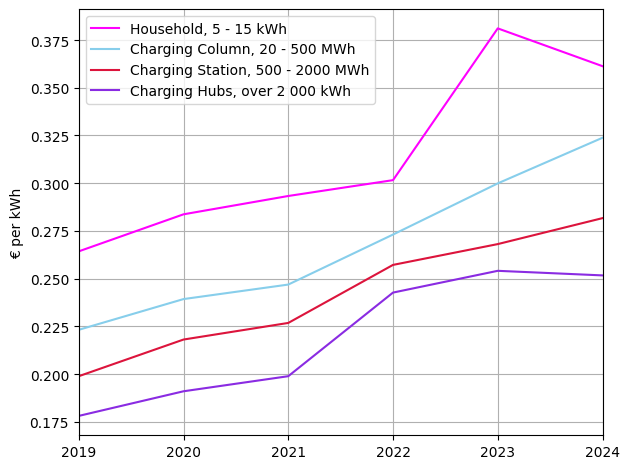

In [34]:
plt.plot(HH_ev['time'], HH_ev['value'], label='Household, 5 - 15 kWh', color='magenta')
plt.plot(NHH_ev_elade['time'], NHH_ev_elade['value'], label='Charging Column, 20 - 500 MWh', color='skyblue')
plt.plot(NHH_ev_parks['time'], NHH_ev_parks['value'], label='Charging Station, 500 - 2000 MWh', color='crimson')
plt.plot(NHH_ev_hubs['time'], NHH_ev_hubs['value'], label='Charging Hubs, over 2 000 kWh', color='blueviolet')

plt.xlim(HH_ev['time'].min(), HH_ev['time'].max())

plt.ylabel('\u20ac per kWh')
plt.xlabel(None)
plt.grid()
#plt.title('Electricity Prices over the Years', size=15)
plt.tight_layout()
plt.legend()
plt.savefig('paper/images/Elec_price', dpi=100)

### 3.3. Calculations

In [35]:
veh = pd.DataFrame({'Tank' : [30, 45, 55, 65, 80],
                    'Battery' : [25, 45, 60, 75, 80],}, index=['Micro', 'Hatchback', 'Sedan', 'SUV', 'Minivan'])
veh.transpose()

,Micro,Hatchback,Sedan,SUV,Minivan
Tank,30,45,55,65,80
Battery,25,45,60,75,80


In [36]:
def char_bil(e, c, eta=1):
    """ Calculates the price for
        charging from 0 to 100%
        e: Energy Capacity [kWh]
        c: Cost [Eur/kWh]
        eta: Grid Efficiency [1]"""
    return e*c/eta

def gas_bil(t, c):
    """ Price for fueling up 
        the tank from 0 to 100%
        t: Tank Capacity [l]
        c: Cost [1000 Eur/1000 l]"""
    return t*c/1e3

In [41]:
charg = pd.DataFrame({'Price': [0.49, 0.59, 0.69, 0.40]}, index=['Column', 'Station', 'Hub', 'Tesla'])

charg.transpose()

,Column,Station,Hub,Tesla
Price,0.49,0.59,0.69,0.4


In [42]:
veh['Petrol'] = np.vectorize(gas_bil)(veh['Tank'], Prices['Petroleum'].iloc[-1])
veh['Diesel'] = np.vectorize(gas_bil)(veh['Tank'], Prices['Diesel'].iloc[-1]) 

veh['Home'] = np.vectorize(char_bil)(veh['Battery'], HH_ev['value'].iloc[-1], eta=.85)
veh['Column'] = np.vectorize(char_bil)(veh['Battery'], charg['Price'].loc['Column'], eta=1)
veh['Station'] = np.vectorize(char_bil)(veh['Battery'], charg['Price'].loc['Station'], eta=1)
veh['Hub'] = np.vectorize(char_bil)(veh['Battery'], charg['Price'].loc['Hub'], eta=1)
veh['Tesla'] = np.vectorize(char_bil)(veh['Battery'], charg['Price'].loc['Tesla'], eta=1)

Assign estimated (by ChatGPT) range to each body type

In [43]:
veh['RE'] = [100, 250, 400, 450, 350]
veh['RC'] = [600, 750, 900, 850, 800]

In [44]:
np.around(veh, 2).dfi.export('paper/images/Prices_summary.png')

In [45]:
veh

,Tank,Battery,Petrol,Diesel,Home,Column,Station,Hub,Tesla,RE,RC
Micro,30,25,53.550,46.530,10.626471,12.25,14.75,17.25,10.0,100,600
Hatchback,45,45,80.325,69.795,19.127647,22.05,26.55,31.05,18.0,250,750
Sedan,55,60,98.175,85.305,25.503529,29.40,35.40,41.40,24.0,400,900
SUV,65,75,116.025,100.815,31.879412,36.75,44.25,51.75,30.0,450,850
Minivan,80,80,142.800,124.080,34.004706,39.20,47.20,55.20,32.0,350,800


In [46]:
ede = pd.DataFrame(index=veh.index)
ede

""
Micro
Hatchback
Sedan
SUV
Minivan


In [47]:
ede['Petrol'] = veh['Petrol']/veh['RC']
ede['Diesel'] = veh['Diesel']/veh['RC']

for charger in ['Home', 'Column', 'Station', 'Hub']:
    ede[charger] = veh[charger]/veh['RE']


In [48]:
ede.dfi.export('paper/images/cost_efficiency.png')

In [49]:
ede

,Petrol,Diesel,Home,Column,Station,Hub
Micro,0.089250,0.077550,0.106265,0.122500,0.147500,0.172500
Hatchback,0.107100,0.093060,0.076511,0.088200,0.106200,0.124200
Sedan,0.109083,0.094783,0.063759,0.073500,0.088500,0.103500
SUV,0.136500,0.118606,0.070843,0.081667,0.098333,0.115000
Minivan,0.178500,0.155100,0.097156,0.112000,0.134857,0.157714
